In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
!pip install mplcursors

In [11]:
import mplcursors
import plotly.express as px

In [12]:
import matplotlib.font_manager as fm

#한글 깨짐 방지
fm.fontManager.addfont(fm.findSystemFonts(fontpaths='/content/drive/MyDrive/Colab Notebooks')[0])

In [13]:
df_dlvr19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/DataSet/KGU_3rd_ORIGIN_KGUDSTNORDER_2019.csv',encoding='cp949')
df_dlvr19.shape

(753360, 6)

In [14]:
df_dlvr19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753360 entries, 0 to 753359
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   DE                    753360 non-null  object
 1   HRLY_TIME             753360 non-null  int64 
 2   DLVR_STORE_INDUTY_NM  753360 non-null  object
 3   DLVR_DSTN_BRTC_NM     753360 non-null  object
 4   DLVR_DSTN_SIGNGU_NM   753360 non-null  object
 5   OREDER_CASCNT         753360 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 34.5+ MB


In [15]:
df_dlvr19.head()

,DE,HRLY_TIME,DLVR_STORE_INDUTY_NM,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,OREDER_CASCNT
0,2019-05-01,0,족발/보쌈,충청북도,제천시,2
1,2019-05-01,0,치킨,충청북도,제천시,5
2,2019-05-01,1,치킨,충청북도,제천시,6
3,2019-05-01,10,패스트푸드,충청북도,제천시,1
4,2019-05-01,10,한식,충청북도,제천시,4


In [16]:
#결측치 확인
df_dlvr19.isna().sum()

DE                      0
HRLY_TIME               0
DLVR_STORE_INDUTY_NM    0
DLVR_DSTN_BRTC_NM       0
DLVR_DSTN_SIGNGU_NM     0
OREDER_CASCNT           0
dtype: int64

In [17]:
#서울시만 뽑자
df_dlvr19_seoul = df_dlvr19[df_dlvr19['DLVR_DSTN_BRTC_NM']=='서울특별시']
df_dlvr19_seoul

,DE,HRLY_TIME,DLVR_STORE_INDUTY_NM,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,OREDER_CASCNT
1780,2019-05-19,14,치킨,서울특별시,중구,1
2072,2019-05-21,16,한식,서울특별시,도봉구,1
2601,2019-05-24,12,치킨,서울특별시,도봉구,1
3603,2019-05-27,23,치킨,서울특별시,중구,1
3888,2019-05-29,16,치킨,서울특별시,도봉구,1
...,...,...,...,...,...,...
753353,2019-12-31,23,회,서울특별시,구로구,3
753354,2019-12-31,23,회,서울특별시,노원구,7
753355,2019-12-31,23,회,서울특별시,도봉구,2
753356,2019-12-31,23,회,서울특별시,영등포구,1


In [18]:
#필요없는 컬럼 삭제
# df_dlvr19_seoul.drop(['HRLY_TIME'], axis=1, inplace=True)

In [19]:
df_dlvr19_seoul.columns

Index(['DE', 'HRLY_TIME', 'DLVR_STORE_INDUTY_NM', 'DLVR_DSTN_BRTC_NM',
       'DLVR_DSTN_SIGNGU_NM', 'OREDER_CASCNT'],
      dtype='object')

In [20]:
#음식 종류별
df_dlvr19_seoul['DLVR_STORE_INDUTY_NM'].unique()

array(['치킨', '한식', '카페/디저트', '분식', '패스트푸드', '피자', '족발/보쌈', '도시락', '찜탕',
       '중식', '돈까스/일식', '회', '야식', '심부름', '아시안/양식', '배달전문업체'], dtype=object)

In [21]:
df_induty = df_dlvr19_seoul[['DLVR_STORE_INDUTY_NM','OREDER_CASCNT']].groupby(by='DLVR_STORE_INDUTY_NM').sum().sort_values(by='OREDER_CASCNT', ascending=False).reset_index()
df_induty

,DLVR_STORE_INDUTY_NM,OREDER_CASCNT
0,치킨,205202
1,분식,119511
2,카페/디저트,95586
3,한식,82268
4,패스트푸드,77748
5,족발/보쌈,60255
6,피자,48568
7,돈까스/일식,33707
8,아시안/양식,31791
9,야식,28361


[Text(0, 0.5, '주문량'), Text(0.5, 0, '음식종류')]

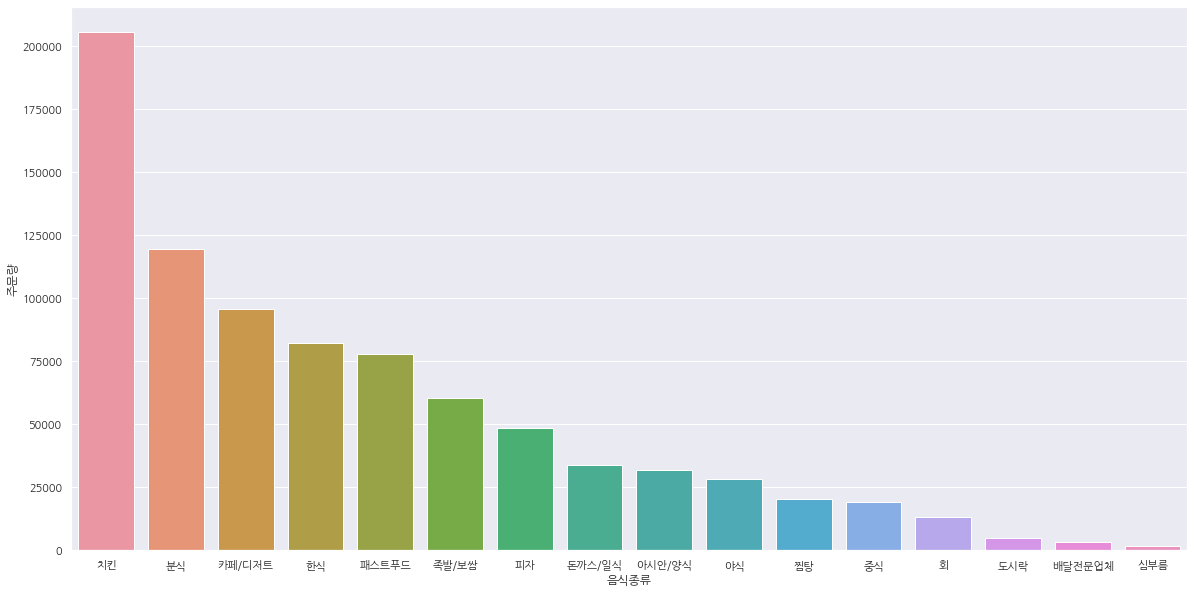

In [140]:
#서울시 음식종류별 주문량
fig, ax = plt.subplots(figsize = (20,10))
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.barplot(x='DLVR_STORE_INDUTY_NM',y='OREDER_CASCNT', data=df_induty)
ax.set(xlabel='음식종류',ylabel='주문량')

In [23]:
#구별 음식 배달수
df_loc19 = df_dlvr19_seoul[['DLVR_DSTN_SIGNGU_NM','OREDER_CASCNT']].groupby(by='DLVR_DSTN_SIGNGU_NM').sum().sort_values(by='OREDER_CASCNT', ascending=False).reset_index()
df_loc19

,DLVR_DSTN_SIGNGU_NM,OREDER_CASCNT
0,구로구,308625
1,영등포구,98588
2,금천구,91877
3,은평구,72810
4,도봉구,67819
5,동작구,36155
6,양천구,34933
7,관악구,31343
8,강남구,20107
9,강서구,18558


[Text(0, 0.5, '주문량'), Text(0.5, 0, '구명')]

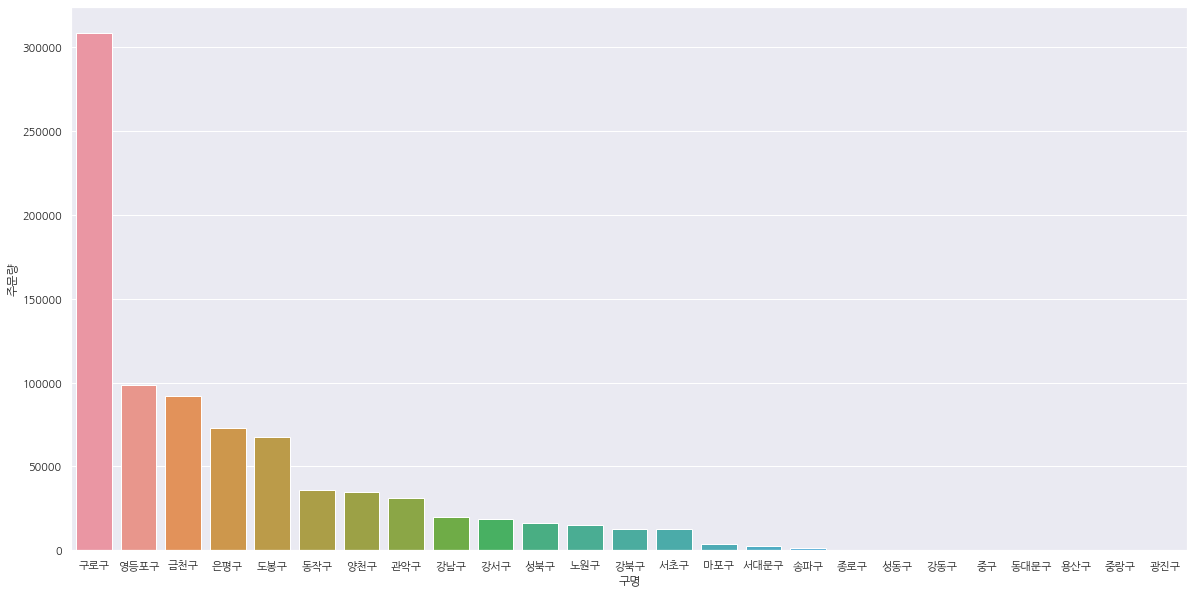

In [24]:
fig, ax = plt.subplots(figsize = (20,10))
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.barplot(x='DLVR_DSTN_SIGNGU_NM',y='OREDER_CASCNT', data=df_loc19)
ax.set(xlabel='구명',ylabel='주문량')

- 압도적으로 구로구가 배달량이 많음 구로구에 대해 알아보자

In [25]:
df_guro19 = df_dlvr19_seoul[df_dlvr19_seoul['DLVR_DSTN_SIGNGU_NM']== '구로구']
df_guro19

,DE,HRLY_TIME,DLVR_STORE_INDUTY_NM,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,OREDER_CASCNT
13119,2019-06-22,0,치킨,서울특별시,구로구,1
32532,2019-07-15,9,패스트푸드,서울특별시,구로구,1
32552,2019-07-15,10,카페/디저트,서울특별시,구로구,2
32556,2019-07-15,10,패스트푸드,서울특별시,구로구,11
32573,2019-07-15,11,분식,서울특별시,구로구,6
...,...,...,...,...,...,...
753276,2019-12-31,23,카페/디저트,서울특별시,구로구,2
753287,2019-12-31,23,패스트푸드,서울특별시,구로구,3
753306,2019-12-31,23,피자,서울특별시,구로구,15
753328,2019-12-31,23,한식,서울특별시,구로구,7


In [26]:
df_induty_guro19 = df_guro19[['DLVR_STORE_INDUTY_NM','OREDER_CASCNT']].groupby(by='DLVR_STORE_INDUTY_NM').sum().sort_values(by='OREDER_CASCNT', ascending=False).reset_index()
df_induty_guro19

,DLVR_STORE_INDUTY_NM,OREDER_CASCNT
0,치킨,83466
1,패스트푸드,47436
2,분식,39627
3,한식,28886
4,족발/보쌈,23339
5,카페/디저트,20809
6,피자,17046
7,돈까스/일식,12880
8,야식,9867
9,중식,8345


[Text(0, 0.5, '주문량'), Text(0.5, 0, '음식종류')]

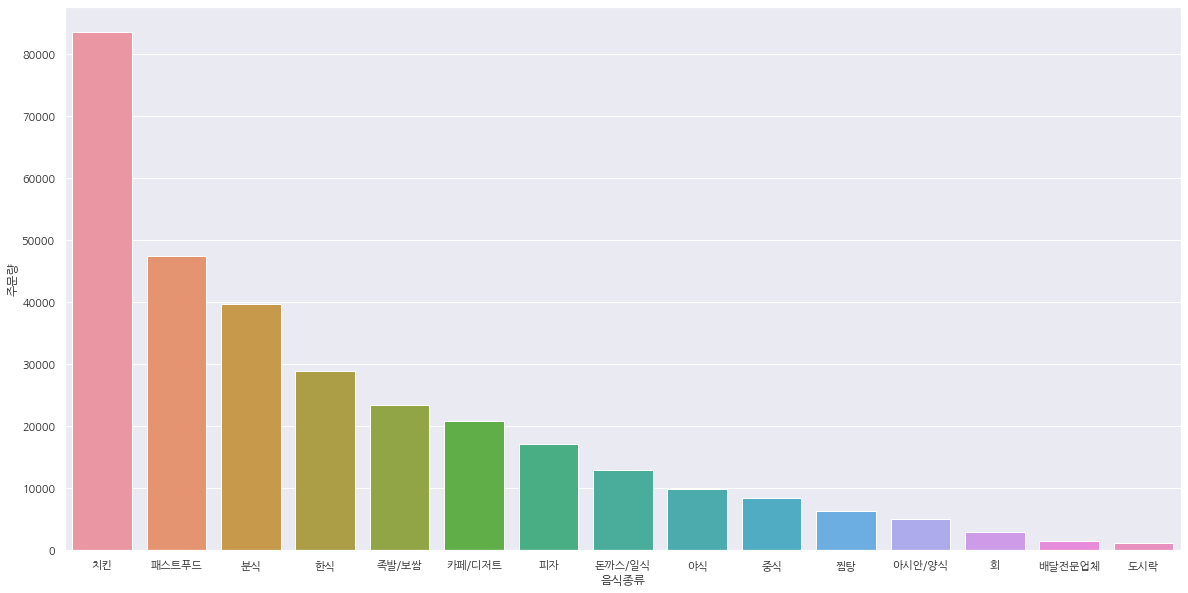

In [27]:
#구로구 음식종류별 주문량
fig, ax = plt.subplots(figsize = (20,10))
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.barplot(x='DLVR_STORE_INDUTY_NM',y='OREDER_CASCNT', data=df_induty_guro19)
ax.set(xlabel='음식종류',ylabel='주문량')

- 치킨은 서울시 전체 통계와 마찬가지로 치킨이 1위이지만 2위는 분식이 아닌 패스트푸드로 나왔다
- 구로구의 시간대 별 음식배달 통계를 보자

In [28]:
df_guro_time19 = df_guro19[['HRLY_TIME','OREDER_CASCNT']].groupby(by='HRLY_TIME').sum().reset_index()
df_guro_time19

,HRLY_TIME,OREDER_CASCNT
0,0,3824
1,1,1809
2,2,621
3,3,3
4,7,4
5,9,754
6,10,4591
7,11,16061
8,12,19968
9,13,17016


[Text(0, 0.5, '주문량'), Text(0.5, 0, '시간')]

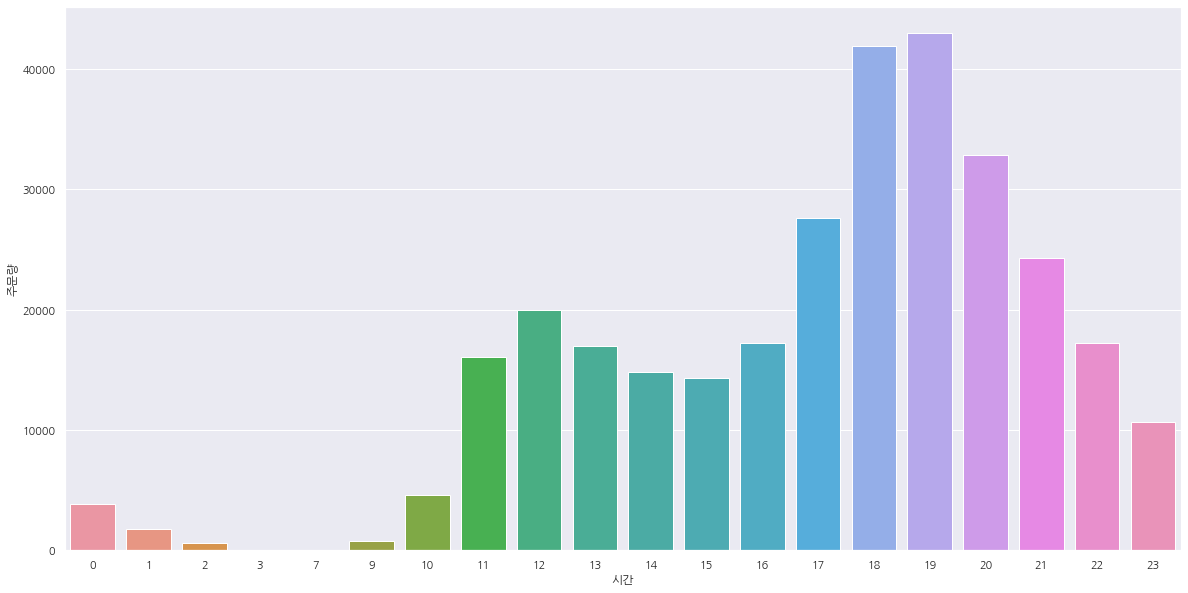

In [29]:
fig, ax = plt.subplots(figsize = (20,10))
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.barplot(x='HRLY_TIME',y='OREDER_CASCNT', data=df_guro_time19)
ax.set(xlabel='시간',ylabel='주문량')

In [30]:
df_guro_piv19 = df_guro19[['HRLY_TIME','DLVR_STORE_INDUTY_NM','OREDER_CASCNT']].pivot_table(index='HRLY_TIME', columns='DLVR_STORE_INDUTY_NM', aggfunc='sum')

In [31]:
df_guro_piv19 = df_guro_piv19.applymap(lambda x: x if x == x else 0)

In [32]:
df_guro_piv19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 23
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (OREDER_CASCNT, 도시락)     20 non-null     float64
 1   (OREDER_CASCNT, 돈까스/일식)  20 non-null     float64
 2   (OREDER_CASCNT, 배달전문업체)  20 non-null     float64
 3   (OREDER_CASCNT, 분식)      20 non-null     float64
 4   (OREDER_CASCNT, 아시안/양식)  20 non-null     float64
 5   (OREDER_CASCNT, 야식)      20 non-null     float64
 6   (OREDER_CASCNT, 족발/보쌈)   20 non-null     float64
 7   (OREDER_CASCNT, 중식)      20 non-null     float64
 8   (OREDER_CASCNT, 찜탕)      20 non-null     float64
 9   (OREDER_CASCNT, 치킨)      20 non-null     float64
 10  (OREDER_CASCNT, 카페/디저트)  20 non-null     float64
 11  (OREDER_CASCNT, 패스트푸드)   20 non-null     float64
 12  (OREDER_CASCNT, 피자)      20 non-null     float64
 13  (OREDER_CASCNT, 한식)      20 non-null     float64
 14  (OREDER_CASCNT, 회)       20 

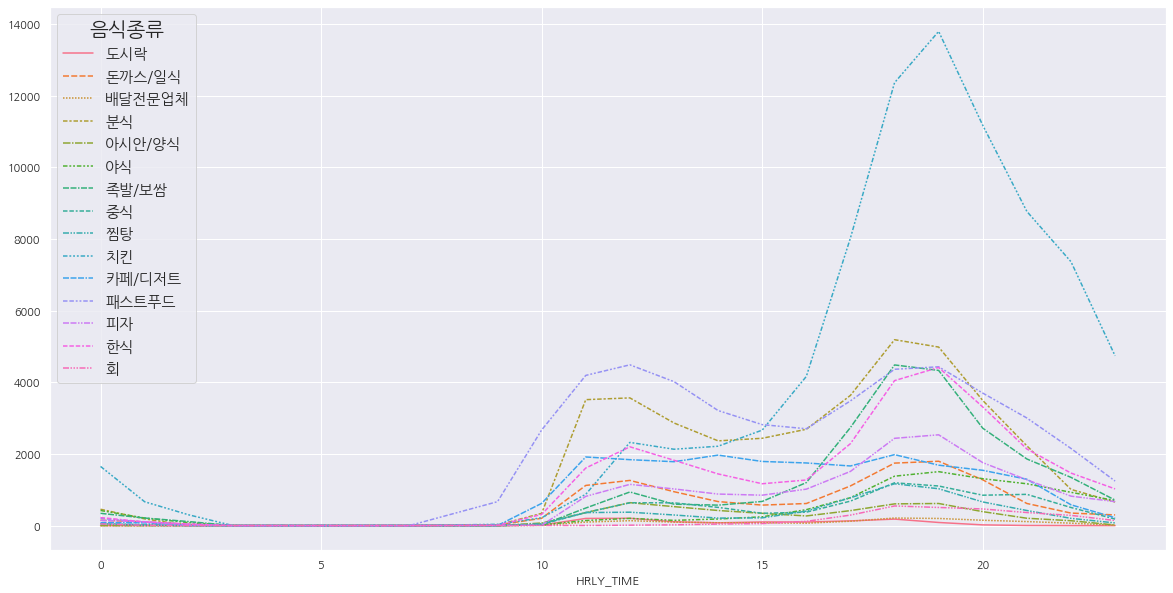

In [33]:
fig, ax = plt.subplots(figsize = (20,10))
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')
sns.lineplot(data=df_guro_piv19['OREDER_CASCNT'], size_order=[i for i in range(1,24)])
plt.legend(title='음식종류', title_fontsize=20, fontsize=15)
mplcursors.cursor(hover=True)
plt.show()

In [34]:
 df_guro_px19 = df_guro19[['HRLY_TIME','DLVR_STORE_INDUTY_NM','OREDER_CASCNT']].groupby(by=['HRLY_TIME','DLVR_STORE_INDUTY_NM']).sum().reset_index()

In [35]:
fig = px.line(df_guro_px19, x='HRLY_TIME', y='OREDER_CASCNT',line_group='DLVR_STORE_INDUTY_NM', color='DLVR_STORE_INDUTY_NM')
fig.show()

- 패스트푸드의 경우 점심시간의 수요가 가장 많았으며 2위는 분식이다
- 배달순위 1위인 치킨은 저녁에 압도적으로 많은 배달 수를 기록했다
- 회사원들이 많은 구로구는 점심시간에 배달음식으로 패스트푸드와 분식을 많이 먹는 것을 알수있다.

- 그렇다면 2020의 데이터는 어떻게 나올까?

In [37]:
df_dlvr20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/DataSet/KGU_3rd_ORIGIN_KGUDSTNORDER_2020.csv',encoding='cp949')
df_dlvr20.shape

(1048575, 6)

In [38]:
df_dlvr20.isna().sum()

DE                      0
HRLY_TIME               0
DLVR_STORE_INDUTY_NM    0
DLVR_DSTN_BRTC_NM       0
DLVR_DSTN_SIGNGU_NM     0
OREDER_CASCNT           0
dtype: int64

In [39]:
#서울시만 뽑자
df_dlvr20_seoul = df_dlvr20[df_dlvr20['DLVR_DSTN_BRTC_NM']=='서울특별시']
df_dlvr20_seoul

,DE,HRLY_TIME,DLVR_STORE_INDUTY_NM,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,OREDER_CASCNT
18,2020-01-01,0,분식,서울특별시,관악구,2
19,2020-01-01,0,분식,서울특별시,구로구,1
20,2020-01-01,0,분식,서울특별시,금천구,2
21,2020-01-01,0,분식,서울특별시,노원구,8
43,2020-01-01,0,야식,서울특별시,구로구,4
...,...,...,...,...,...,...
1048552,2020-07-20,11,치킨,서울특별시,금천구,3
1048553,2020-07-20,11,치킨,서울특별시,동작구,1
1048554,2020-07-20,11,치킨,서울특별시,서초구,3
1048555,2020-07-20,11,치킨,서울특별시,영등포구,5


In [40]:
df_induty20 = df_dlvr20_seoul[['DLVR_STORE_INDUTY_NM','OREDER_CASCNT']].groupby(by='DLVR_STORE_INDUTY_NM').sum().sort_values(by='OREDER_CASCNT', ascending=False).reset_index()
df_induty20

,DLVR_STORE_INDUTY_NM,OREDER_CASCNT
0,치킨,287834
1,분식,133523
2,패스트푸드,113625
3,카페/디저트,104753
4,한식,100596
5,족발/보쌈,84708
6,피자,64642
7,돈까스/일식,44988
8,야식,42879
9,중식,32241


[Text(0, 0.5, '주문량'), Text(0.5, 0, '음식종류')]

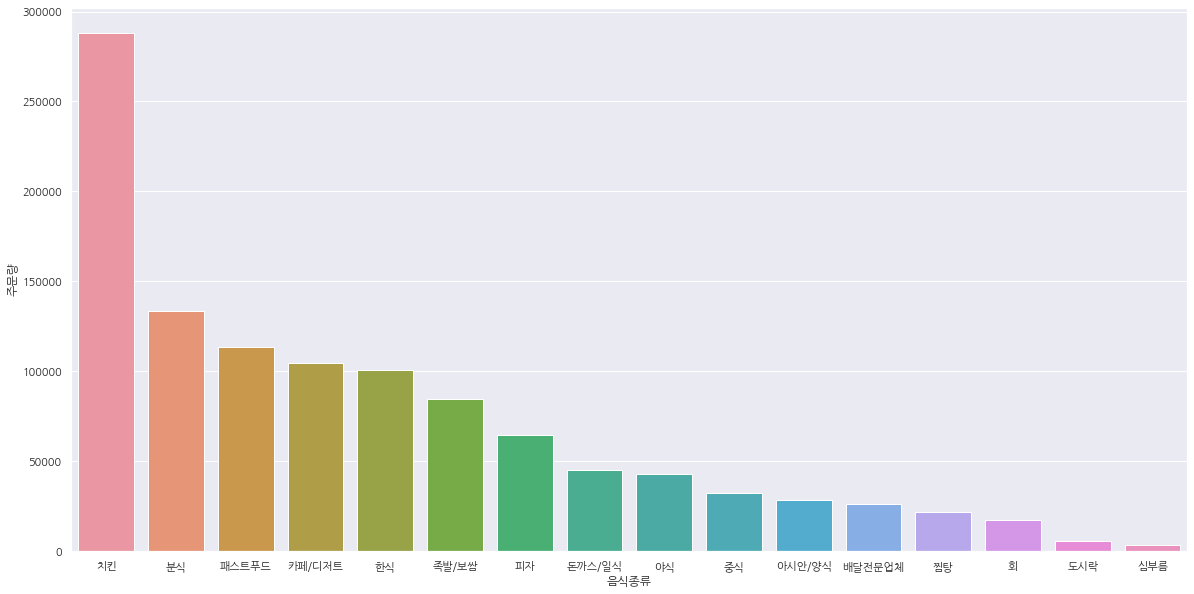

In [41]:
#서울시 음식종류별 주문량
fig, ax = plt.subplots(figsize = (20,10))
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.barplot(x='DLVR_STORE_INDUTY_NM',y='OREDER_CASCNT', data=df_induty20)
ax.set(xlabel='음식종류',ylabel='주문량')

In [42]:
#구별 음식 배달수
df_loc20 = df_dlvr20_seoul[['DLVR_DSTN_SIGNGU_NM','OREDER_CASCNT']].groupby(by='DLVR_DSTN_SIGNGU_NM').sum().sort_values(by='OREDER_CASCNT', ascending=False).reset_index()
df_loc20

,DLVR_DSTN_SIGNGU_NM,OREDER_CASCNT
0,구로구,404835
1,금천구,180726
2,영등포구,150000
3,은평구,88472
4,도봉구,80839
5,관악구,57595
6,동작구,52047
7,양천구,42334
8,노원구,34003
9,서초구,10782


[Text(0, 0.5, '주문량'), Text(0.5, 0, '구명')]

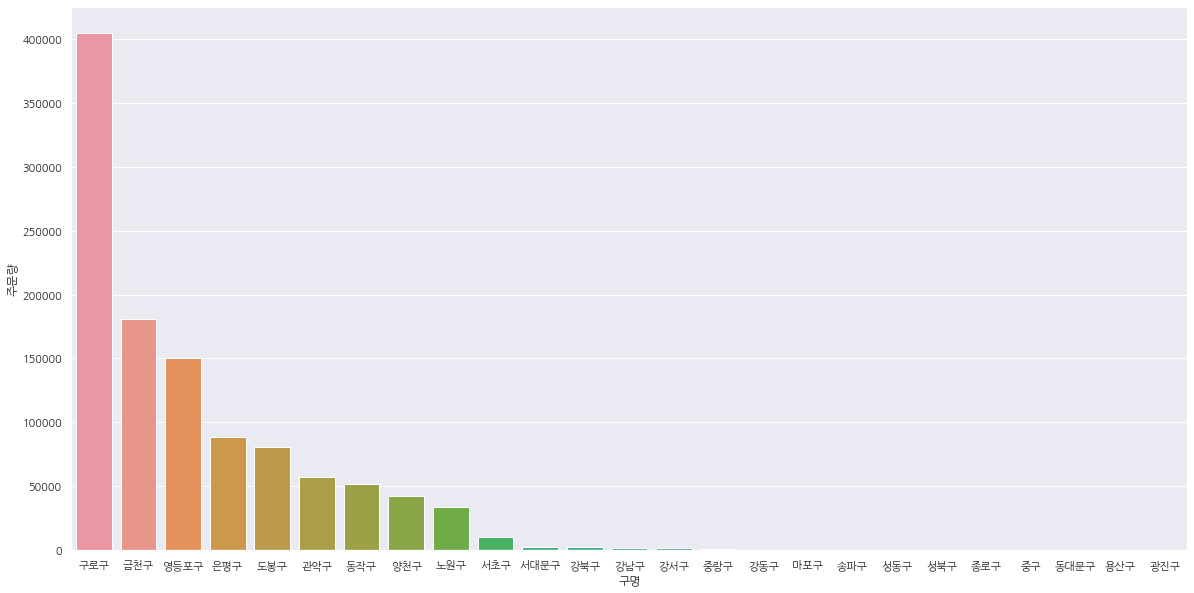

In [43]:
fig, ax = plt.subplots(figsize = (20,10))
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.barplot(x='DLVR_DSTN_SIGNGU_NM',y='OREDER_CASCNT', data=df_loc20)
ax.set(xlabel='구명',ylabel='주문량')

- 2020년도 압도적으로 배달이 많은 지역으로 구로구가 1위였으며, 2위였던 영등포구가 3위로 밀리고 금천구가 2위로 올라섰다. 전체적인 순위는 2019년고 크게 바뀌지 않음을 알수 있다.

In [44]:
df_guro20 = df_dlvr20_seoul[df_dlvr20_seoul['DLVR_DSTN_SIGNGU_NM']== '구로구']
df_guro20

,DE,HRLY_TIME,DLVR_STORE_INDUTY_NM,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,OREDER_CASCNT
19,2020-01-01,0,분식,서울특별시,구로구,1
43,2020-01-01,0,야식,서울특별시,구로구,4
62,2020-01-01,0,족발/보쌈,서울특별시,구로구,10
80,2020-01-01,0,찜탕,서울특별시,구로구,1
106,2020-01-01,0,치킨,서울특별시,구로구,25
...,...,...,...,...,...,...
1048476,2020-07-20,11,야식,서울특별시,구로구,1
1048489,2020-07-20,11,족발/보쌈,서울특별시,구로구,3
1048500,2020-07-20,11,중식,서울특별시,구로구,7
1048528,2020-07-20,11,찜탕,서울특별시,구로구,1


In [45]:
df_induty_guro20 = df_guro20[['DLVR_STORE_INDUTY_NM','OREDER_CASCNT']].groupby(by='DLVR_STORE_INDUTY_NM').sum().sort_values(by='OREDER_CASCNT', ascending=False).reset_index()
df_induty_guro20

,DLVR_STORE_INDUTY_NM,OREDER_CASCNT
0,치킨,120097
1,패스트푸드,50916
2,분식,42499
3,한식,38936
4,족발/보쌈,30098
5,카페/디저트,26933
6,피자,21380
7,돈까스/일식,19642
8,중식,14500
9,찜탕,10951


[Text(0, 0.5, '주문량'), Text(0.5, 0, '음식종류')]

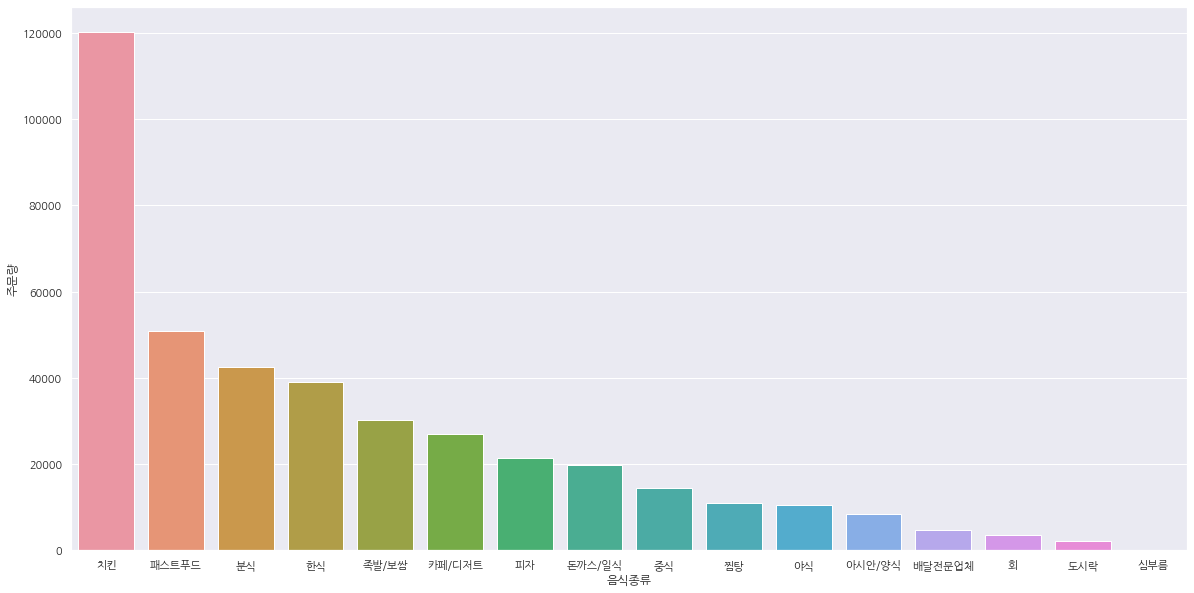

In [46]:
#구로구 음식종류별 주문량
fig, ax = plt.subplots(figsize = (20,10))
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.barplot(x='DLVR_STORE_INDUTY_NM',y='OREDER_CASCNT', data=df_induty_guro20)
ax.set(xlabel='음식종류',ylabel='주문량')

- 2019년과 2020년의 값들의 비중은 크게 바뀌지 않은것으로 보인다 그런다면, 2019년과 2020년의 배달건수 차이를 알아보자

In [47]:
df_dlvr19['YEAR'] = df_dlvr19['DE'].apply(lambda x: int(x[:4]))
df_dlvr20['YEAR'] = df_dlvr20['DE'].apply(lambda x: int(x[:4]))

In [48]:
df_dlvr19_cnt = df_dlvr19.groupby(['YEAR','DLVR_STORE_INDUTY_NM'])['OREDER_CASCNT'].sum()
df_dlvr19_cnt

YEAR  DLVR_STORE_INDUTY_NM
2019  도시락                      44540
      돈까스/일식                  187418
      배달전문업체                   68983
      분식                      557231
      심부름                      15816
      아시안/양식                  107282
      야식                      154340
      족발/보쌈                   329518
      중식                      108406
      찜탕                      145848
      치킨                      998756
      카페/디저트                  355581
      패스트푸드                   322055
      피자                      228044
      한식                      530625
      회                        80389
Name: OREDER_CASCNT, dtype: int64

In [49]:
df_dlvr20_cnt = df_dlvr20.groupby(['YEAR','DLVR_STORE_INDUTY_NM'])['OREDER_CASCNT'].sum()
df_dlvr20_cnt

YEAR  DLVR_STORE_INDUTY_NM
2020  도시락                       76547
      돈까스/일식                   341626
      배달전문업체                   163781
      분식                       785034
      심부름                       24392
      아시안/양식                   147929
      야식                       288518
      족발/보쌈                    503690
      중식                       228909
      찜탕                       268137
      치킨                      1496081
      카페/디저트                   609717
      패스트푸드                    438209
      피자                       347722
      한식                       887707
      회                        128637
Name: OREDER_CASCNT, dtype: int64

In [50]:
df_dlvr_cnt = pd.DataFrame(pd.concat([df_dlvr19_cnt,df_dlvr20_cnt])).reset_index()
df_dlvr_cnt

,YEAR,DLVR_STORE_INDUTY_NM,OREDER_CASCNT
0,2019,도시락,44540
1,2019,돈까스/일식,187418
2,2019,배달전문업체,68983
3,2019,분식,557231
4,2019,심부름,15816
5,2019,아시안/양식,107282
6,2019,야식,154340
7,2019,족발/보쌈,329518
8,2019,중식,108406
9,2019,찜탕,145848


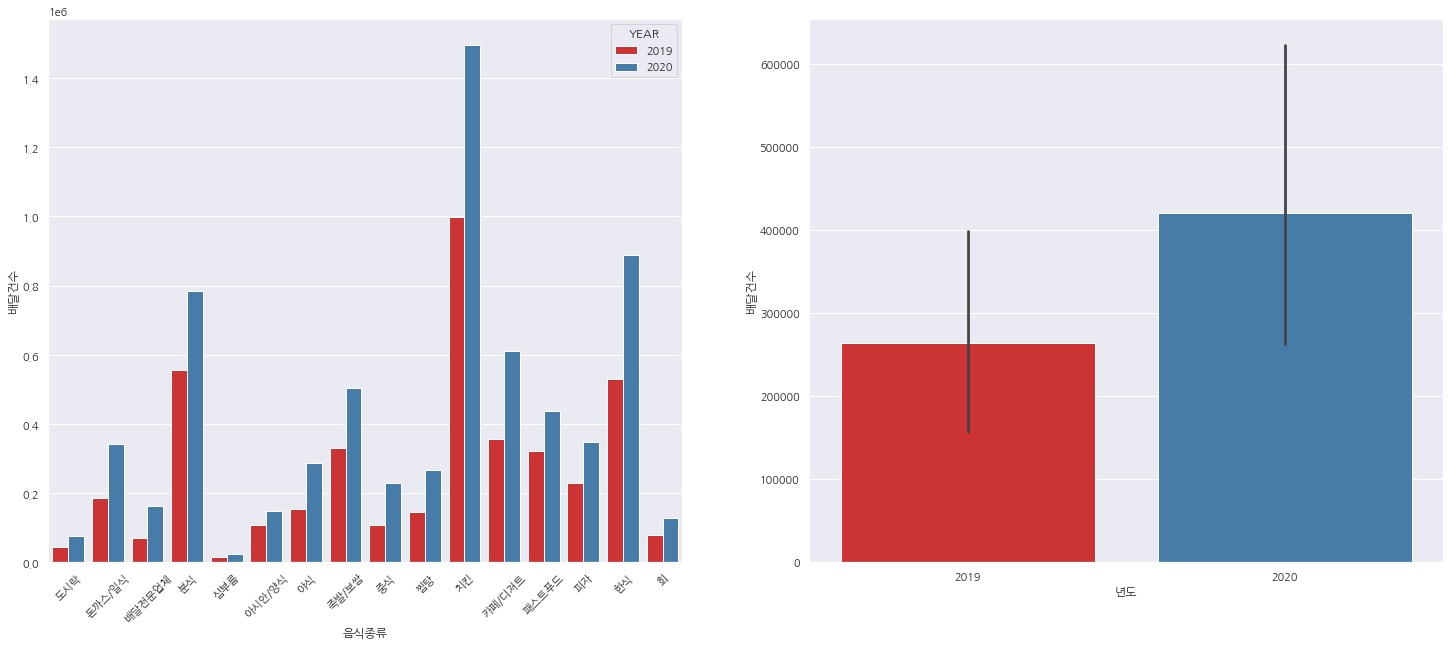

In [152]:
#서울시 2019~2020년 배달음식 수
fig, ax = plt.subplots(1,2,figsize = (25,10))
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')
a = sns.barplot(x='DLVR_STORE_INDUTY_NM',y='OREDER_CASCNT', hue='YEAR', data=df_dlvr_cnt, palette='Set1', ax=ax[0])
a.set(xlabel='음식종류',ylabel='배달건수')
a.set_xticklabels(a.get_xticklabels(), rotation=45)

b = sns.barplot(x='YEAR',y='OREDER_CASCNT', data=df_dlvr_cnt, palette='Set1', ax=ax[1])
b.set(xlabel='년도',ylabel='배달건수')
plt.show()

- 모든 음식에서 2019년도보다 2020년의 배달건수가 많습니다.
- 2020년 코로나 유행으로 인하여 재택근무를 실행한 회사들이 많았습니다. 재택근무가 배달건수에, 특히 점심시간에 영향을 줄것이라 생각이 듭니다. 시간 대별로 확인을 해 봅시다.

In [52]:
df_dlvr19_time = df_dlvr19[['HRLY_TIME','OREDER_CASCNT']].groupby('HRLY_TIME').sum()
df_dlvr19_time

,OREDER_CASCNT
HRLY_TIME,
0,71608
1,36689
2,14840
3,6407
4,4691
5,3143
6,2889
7,3174
8,4313


In [53]:
df_dlvr20_time = df_dlvr20[['HRLY_TIME','OREDER_CASCNT']].groupby('HRLY_TIME').sum()
df_dlvr20_time

,OREDER_CASCNT
HRLY_TIME,
0,108651
1,58971
2,26334
3,11018
4,7484
5,5517
6,5386
7,6129
8,9286


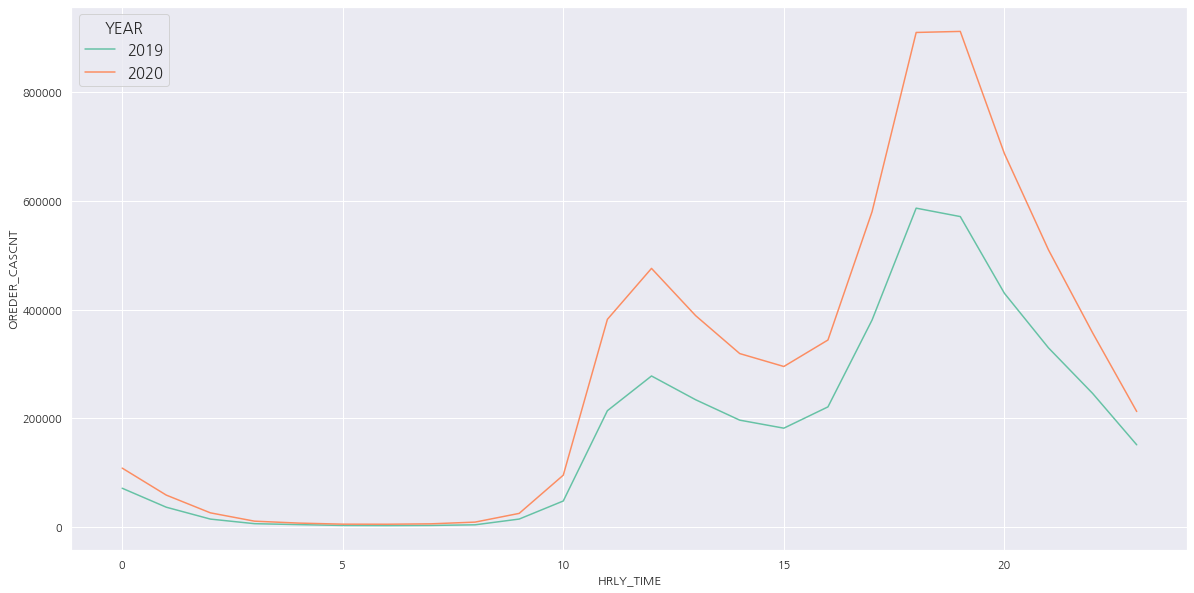

In [54]:
#서울시 2019~2020년 배달음식 수
y = pd.concat([df_dlvr19_time, df_dlvr20_time], axis=0, keys=['2019', '2020']).reset_index()

fig, ax = plt.subplots(figsize = (20,10))
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')
sns.lineplot(x='HRLY_TIME', y='OREDER_CASCNT', hue='level_0', data=y, palette='Set2')
plt.legend(title='YEAR', loc='upper left', title_fontsize=15, fontsize=15)

- 점심시간, 저녁시간에 다른 시간대보다 많은 증가 폭이 있었습니다. 
- 결과적으로 재택근무와 배달건수는 크게 상관이 없음을 알 수 있었습니다.

- 코로나 유행시기에 따라 증가율이 궁금해진다. 어떠한 달이 가장 많은 증가율을 보였는지 월별 비교를 해보자.


In [90]:
#월별 컬럼이 없다. 각각 추가
df_dlvr19['MONTH'] = df_dlvr19['DE'].apply(lambda x: x[5:7])
df_dlvr20['MONTH'] = df_dlvr20['DE'].apply(lambda x: x[5:7])

In [97]:
#월별 groupby
df_dlvr19_gr = df_dlvr19[['YEAR','MONTH','OREDER_CASCNT']].groupby(by=['YEAR','MONTH']).sum()
df_dlvr20_gr = df_dlvr20[['YEAR','MONTH','OREDER_CASCNT']].groupby(by=['YEAR','MONTH']).sum()

In [125]:
#concat
df_dlvr = pd.concat([df_dlvr19_gr,df_dlvr20_gr]).reset_index()
df_dlvr['MONTH'].unique()

array(['05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03',
       '04'], dtype=object)

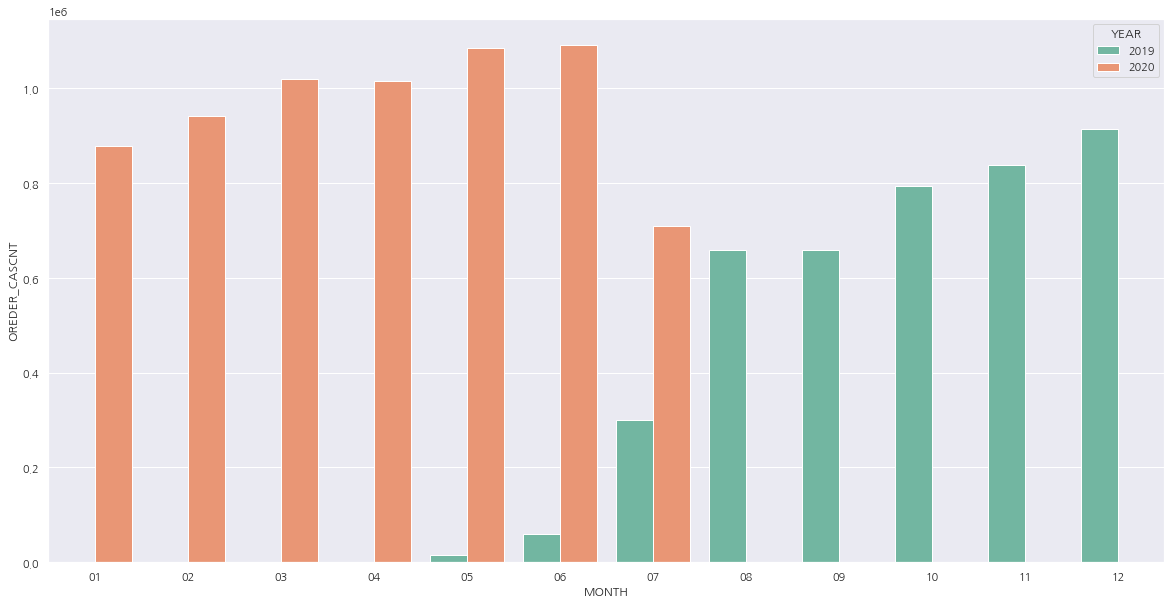

In [102]:
fig, ax = plt.subplots(figsize = (20,10))
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')
sns.barplot(x='MONTH', y='OREDER_CASCNT', hue='YEAR', data=df_dlvr, palette='Set2', order=['01','02','03','04','05','06','07','08','09','10','11','12'])
# plt.legend(title='YEAR', loc='upper left', title_fontsize=15, fontsize=15)

- 데이터가 이상하다.. 하나는 상반기 하나는 하반기의 데이터이다 정확하게 비교할수가 없어 다른 데이터를 이용한다


In [117]:
df_dlvr_dis19_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/DataSet/KGU_3rd_ORIGIN_KGUINSCTNORDR_2019_1.csv', encoding='cp949')
df_dlvr_dis19_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/DataSet/KGU_3rd_ORIGIN_KGUINSCTNORDR_2019_2.csv', encoding='cp949')
df_dlvr_dis19 = pd.concat([df_dlvr_dis19_1,df_dlvr_dis19_2])

In [118]:
df_dlvr_dis19.shape

(10592, 7)

In [119]:
df_dlvr_dis19.head()

,YEAR,MONTH,TYPE,LOC1,LOC2,DIS,CNT
0,2019,5,한식,경기도,수원시 장안구,1500m이하,6
1,2019,5,한식,경기도,수원시 장안구,1500m초과 3000m이하,7
2,2019,5,한식,경기도,수원시 장안구,5000m초과,1
3,2019,5,패스트푸드,경기도,수원시 팔달구,1500m이하,3
4,2019,5,패스트푸드,경기도,수원시 팔달구,3000m초과 5000m이하,3


In [121]:
df_dlvr_dis19['MONTH'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12])

- 19년도의 자료가 부족하다. 5~12월까지의 데이터만 확인해보자

In [122]:
df_dlvr_dis20_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/DataSet/KGU_3rd_ORIGIN_KGUINSCTNORDR_2020_1.csv', encoding='cp949')
df_dlvr_dis20_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/DataSet/KGU_3rd_ORIGIN_KGUINSCTNORDR_2020_2.csv', encoding='cp949')
df_dlvr_dis20 = pd.concat([df_dlvr_dis20_1,df_dlvr_dis20_2])

In [124]:
df_dlvr_dis20['MONTH'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [126]:
df_dlvr_dis20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22868 entries, 0 to 11438
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   YEAR    22868 non-null  int64 
 1   MONTH   22868 non-null  int64 
 2   TYPE    22868 non-null  object
 3   LOC1    22868 non-null  object
 4   LOC2    22868 non-null  object
 5   DIS     22868 non-null  object
 6   CNT     22868 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.4+ MB


In [127]:
df_dlvr_dis20 = df_dlvr_dis20[df_dlvr_dis20['MONTH'] >= 5]

In [128]:
df_dlvr_dis20['MONTH'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12])

In [129]:
df_dlvr_dis = pd.concat([df_dlvr_dis19,df_dlvr_dis20])

In [130]:
#서울만
df_dlvr_dis_seoul = df_dlvr_dis[df_dlvr_dis['LOC1'] == '서울특별시']
df_dlvr_dis_seoul

,YEAR,MONTH,TYPE,LOC1,LOC2,DIS,CNT
138,2019,5,심부름,서울특별시,강남구,1500m초과 3000m이하,1
139,2019,5,카페/디저트,서울특별시,노원구,1500m이하,13
140,2019,5,카페/디저트,서울특별시,노원구,1500m초과 3000m이하,1
141,2019,5,치킨,서울특별시,도봉구,1500m이하,3
142,2019,5,카페/디저트,서울특별시,도봉구,1500m이하,1
...,...,...,...,...,...,...,...
11059,2020,12,아시안/양식,서울특별시,중구,1500m초과 3000m이하,8
11060,2020,12,한식,서울특별시,중구,1500m이하,185
11061,2020,12,한식,서울특별시,중구,1500m초과 3000m이하,107
11062,2020,12,한식,서울특별시,중구,3000m초과 5000m이하,31


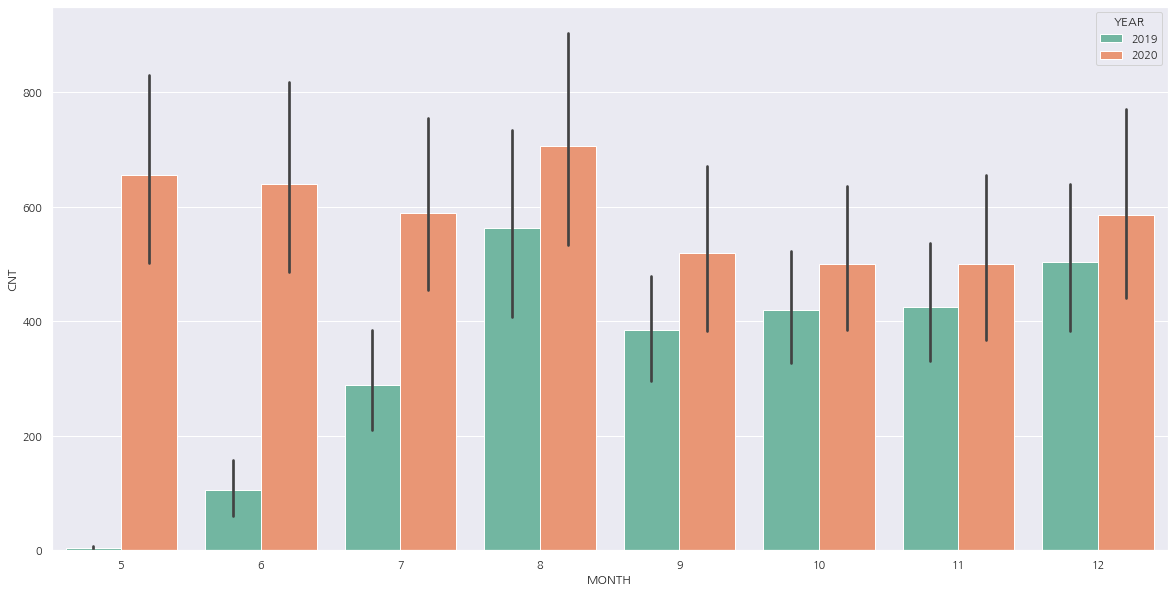

In [139]:
fig, ax = plt.subplots(figsize = (20,10))
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')
sns.barplot(x='MONTH', y='CNT', hue='YEAR', data=df_dlvr_dis_seoul, palette='Set2')

- 가지고 있는 데이터를 확인해 보더라도 2019년보다 2020년도의 배달 건수가 증가했음을 알수 있다.

### 배달 건수 상위TOP3의 식품 영양 정보

In [56]:
df_food = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/DataSet/통합_식품영양성분DB.csv',encoding='cp949')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12,14,18,19,21,45,222) have mixed types.Specify dtype option on import or set low_memory=False.



In [57]:
df_food.shape

(80577, 240)

In [58]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80577 entries, 0 to 80576
Columns: 240 entries, SAMPLE_ID to 발행기관
dtypes: float64(1), int64(1), object(238)
memory usage: 147.5+ MB


In [59]:
print(list(df_food.columns))

['SAMPLE_ID', '식품코드', 'DB군', '상용제품', '식품명', '연도', '지역 / 제조사', '채취시기', '식품대분류', '식품상세분류', '1회제공량', '내용량_단위', '총내용량(g)', '총내용량(mL)', '에너지(㎉)', '에너지(kj)', '수분(g)', '수분(%)', '단백질(g)', '지방(g)', '지질-가식부 100g당', '탄수화물(g)', '총당류(g)', '자당(g)', '포도당(g)', '과당(g)', '유당(g)', '맥아당(g)', '갈락토오스(g)', '당알콜(g)', '에리스리톨(g)', '총 식이섬유(g)', '총 식이섬유(mg)', '총 식이섬유(%)', '수용성 식이섬유(g)', '불용성 식이섬유(g)', '셀룰로오스(%)', '리그닌(%)', '칼슘(㎎)', '철(㎎)', '철(㎍)', '마그네슘(㎎)', '인(㎎)', '칼륨(g)', '칼륨(㎎)', '나트륨(㎎)', '아연(㎎)', '구리(㎎)', '구리(㎍)', '망간(㎎)', '망간(㎍)', '셀레늄(㎍)', '몰리브덴(㎍)', '요오드(㎍)', '염소(㎎)', '비타민 A(㎍)', '비타민 A(㎍ RE)', '레티놀(㎍)', '베타카로틴(㎍)', '레티놀A효능', '비타민 D(D2+D3)(㎍)', '비타민 D2(㎍)', '비타민 D3(㎍)', '비타민 D1(㎍)', '비타민 E(㎎)', '비타민 E(㎎ α-TE)', '알파 토코페롤(㎎)', '베타 토코페롤(㎎)', '감마 토코페롤(㎎)', '델타 토코페롤(㎎)', '알파 토코트리에놀(㎎)', '베타 토코트리에놀(㎎)', '감마 토코트리에놀(㎎)', '델타 토코트리에놀(㎎)', '토코페롤(㎎)', '토코트리에놀(㎎)', '비타민 K(㎎)', '비타민 K(㎍)', '비타민 K1(㎍)', '비타민 K2(㎍)', '비타민 B1(㎎)', '비타민 B1(㎍)', '비타민 B2(㎎)', '비타민 B2(㎍)', '나이아신(㎎)', '나이아신(㎎ NE)', '나이아신(NE)(㎎)', '나이아신(NE)(㎎ 

In [60]:
df_food.describe()

,연도,1회제공량
count,80577.000000,80577.000000
mean,2019.707373,291.297933
std,1.190602,12225.645172
min,2016.000000,0.030000
25%,2019.000000,70.000000
50%,2020.000000,100.000000
75%,2021.000000,150.000000
max,2021.000000,1000000.000000


In [61]:
#우리는 배달건수 Top3의 음식들의 평균 나트륨 함량을 구하고 싶다.

In [62]:
df_food['DB군'].unique()

array(['농축산물', '수산물', '음식', '가공식품'], dtype=object)

In [63]:
df_food['식품대분류'].unique()

array(['농축산물', '수산물', '구이류', '국 및 탕류', '볶음류', '기타', '튀김류', '회류',
       '찌개 및 전골류', '찜류', '생채및 무침류', '김치류', '숙채류', '곡류 및 서류', '면 및 만두류',
       '밥류', '빵류', '음료 및 차류', '장아찌 및 절임류', '전.적 및 부침류', '조림류', '죽 및 스프류',
       '포류', '과자류', '아이스크림류', '젓갈류', '과자', '과/채주스', '탄산음료', '과/채음료',
       '인삼/홍삼음료', '혼합음료', '음료베이스', '건면', '생면', '기타발효음료', '가공두유', '유산균음료',
       '캔디류', '환자용 식품', '숙면', '커피', '기타가공품', '유탕면', '초콜릿가공품', '즉석섭취식품',
       '빙과', '탄산수', '추잉껌', '소시지', '햄', '프레스햄', '만두피', '발효소시지', '농후발효유',
       '가공유', '강화우유', '가공치즈', '만두', '식육추출가공품', '양념육', '분쇄가공육제품', '액상차',
       '참기름', '콩기름(대두유)', '기타식물성유지', '고형차', '잼', '즉석조리식품', '영/유아용 이유식',
       '소스', '곡류가공품', '마요네즈', '카레(커리)', '가공버터', '밀크초콜릿', '어육소시지', '초콜릿',
       '두부', '복합조미식품', '가공두부', '기타 수산물가공품', '자연치즈', '들기름', '발효유', '우유',
       '향미유', '당절임', '두류가공품', '떡류', '물엿', '서류가공품', '준초콜릿', '체중조절용 조제식품',
       '아이스크림', '알가열제품', '아이스밀크', '설탕', '기타설탕', '해바라기유', '올리브유', '어묵',
       '묵류', '토마토케첩', '기타 어육가공품', '조미김', '올리고당', '채종유(유채유 또는 카놀라유)',


In [64]:
df_food['식품상세분류'].unique()

array(['곡류 및 그 제품', '감자 및 전분류', '당류', '두류', '견과류 및 종실류', '채소류', '버섯류',
       '과실류', '육류', '난류', '어패류 및 기타 수산물', '해조류', '우유 및 유제품류', '유지류', '차류',
       '음료류', '주류', '조미료류', '조리가공품류', '기타', '어류', '수산가공품', '패류', '갑각류',
       '두족류', '육류구이', '채소류구이', '어패류구이', '어패류국.탕', '채소류국.탕', '기타 국류',
       '육류국.탕', '기타 볶음류', '육류볶음', '육류튀김', '회류', '육류찌개.전골', '어패류찜',
       '어패류무침', '김치', '나물.숙채류', '떡류', '곡류 및 서류', '중식면류', '라면류', '국수류',
       '스파게티류', '나물.채소류무침', '기타 생채.무침류', '김밥(초밥)류', '기타 밥류', '덮밥류',
       '비빔밥류', '볶음밥류', '쌀밥.잡곡밥류', '채소류볶음', '어패류볶음', '기타 빵류', '앙금빵류',
       '크림빵류', '피자류', '샌드위치류', '도넛류', '케이크류', '페이스트리류', '기타 음료류',
       '장아찌.절임류', '적류', '어패류전', '채소류전', '부침류', '육류전', '어패류조림', '채소류조림',
       '육류조림', '죽류', '어패류찌개.전골', '채소류찌개.전골', '육류찜', '채소류튀김', '어패류튀김',
       '치킨류', '포류', '한과류', '샐러드', '리조또.그라탕류', '기타 튀김류', '떡볶이류', '아이스크림류',
       '커피류', '과일.채소음료류', '탄산음료류', '스무디류', '식빵류', '빙수류', '기타 과자류',
       '우유.유제품류', '쿠키.비스킷류', '스프류', '초콜릿류', '스낵류', '버거류', '만두류', '채소류찜',
       '냉국류', '기

- 카테고리 확인 결과
 > 치킨 - 치킨    
 > 분식 - 떡볶이    
 > 한식 - 찌개    

- 분식의 경우 대표매뉴인 떡볶이를 기준으로
- 한식의 경우 찌개를 기준으로
- 배달이기 때문에 외식음식으로 취급, 상용제품은 외식으로

In [65]:
#치킨 평균 나트륨 구하기
#필요한 컬럼만 가지고오자
#상용제품, 식품명, 식품대분류, 식품상세분류, '1회제공량', 나트륨(㎎)
df_chicken = df_food[['상용제품', '식품명', '식품대분류','식품상세분류','1회제공량','나트륨(㎎)']]
df_chicken

,상용제품,식품명,식품대분류,식품상세분류,1회제공량,나트륨(㎎)
0,품목대표,"귀리, 겉귀리, 도정, 생것",농축산물,곡류 및 그 제품,100.0,2
1,품목대표,"귀리, 쌀귀리, 도정, 생것",농축산물,곡류 및 그 제품,100.0,3
2,품목대표,"귀리, 오트밀",농축산물,곡류 및 그 제품,100.0,4
3,품목대표,"기장, 도정, 생것",농축산물,곡류 및 그 제품,100.0,6
4,품목대표,"기장, 찰기장, 도정, 생것",농축산물,곡류 및 그 제품,100.0,5
...,...,...,...,...,...,...
80572,상용제품,라이스파파 복분자 스틱쌀과자,과자,스낵과자,20.0,5.6
80573,상용제품,라이스파파 시금치 떡뻥 쌀과자,과자,스낵과자,20.0,0.8
80574,상용제품,라이스파파 양파 옹알이쌀과자,과자,스낵과자,20.0,5.6
80575,상용제품,라이스파파 시금치옹알이 쌀과자,과자,스낵과자,20.0,0.2


In [66]:
#결측치
df_chicken.isna().sum()

상용제품      0
식품명       0
식품대분류     0
식품상세분류    0
1회제공량     0
나트륨(㎎)    0
dtype: int64

In [67]:
df_chicken = df_chicken[df_chicken['상용제품']=='품목대표']
df_chicken = df_chicken[df_chicken['식품상세분류']=='치킨류']
df_chicken.rename(columns={'나트륨(㎎)': '나트륨'}, inplace=True)
df_chicken

,상용제품,식품명,식품대분류,식품상세분류,1회제공량,나트륨
4759,품목대표,양념치킨,튀김류,치킨류,200.0,805.49
4762,품목대표,치킨까스,튀김류,치킨류,200.0,779.2713541
11787,품목대표,간장양념치킨,튀김류,치킨류,200.0,1187.57
11804,품목대표,치킨너겟,튀김류,치킨류,150.0,843.88
11806,품목대표,후라이드치킨,튀김류,치킨류,200.0,386.81


In [68]:
df_chicken.dtypes

상용제품       object
식품명        object
식품대분류      object
식품상세분류     object
1회제공량     float64
나트륨        object
dtype: object

In [69]:
df_chicken.isna().sum()

상용제품      0
식품명       0
식품대분류     0
식품상세분류    0
1회제공량     0
나트륨       0
dtype: int64

In [70]:
df_chicken['나트륨'].unique()

array(['805.49', '779.2713541', '1187.57', '843.88', '386.81'],
      dtype=object)

In [71]:
# '-' <- 이게 들어가있네...변환!
df_chicken['나트륨'] = df_chicken['나트륨'].apply(lambda x: 0 if x== '-' else x).astype('float')
df_chicken['나트륨']

4759      805.490000
4762      779.271354
11787    1187.570000
11804     843.880000
11806     386.810000
Name: 나트륨, dtype: float64

In [72]:
df_chicken['나트륨'].unique()

array([ 805.49     ,  779.2713541, 1187.57     ,  843.88     ,
        386.81     ])

In [73]:
# 현재 1회제공량이 통일이 되어있지 않기때문에 모든 1회제공량을 100g 기준으로 맞춰준다
# 100g 기준 현재 g비율 : 현재g / 100
#100g 기준 계산해야 할 나트륨 비율
#100g보다 큰 음식 :   현재 나트륨 / 100g 기준 현재 g비율
#100g보다 작은 음식 : 현재 나트륨 * (1-100g 기준 현재 g비율)
# 반올림하여 구한다

def adjustment_serving_size(x) :
  if x['1회제공량'] == 100 :
    return x

  gram = x['1회제공량']
  na = x['나트륨']
  g_per = gram/100

  x['1회제공량'] = 100
  x['나트륨'] = round(na * 1 - g_per,2) if g_per < 1 else round(na/g_per,2)

  return x


In [74]:
df_chicken = df_chicken.apply(adjustment_serving_size, axis=1)
df_chicken

,상용제품,식품명,식품대분류,식품상세분류,1회제공량,나트륨
4759,품목대표,양념치킨,튀김류,치킨류,100,402.75
4762,품목대표,치킨까스,튀김류,치킨류,100,389.64
11787,품목대표,간장양념치킨,튀김류,치킨류,100,593.78
11804,품목대표,치킨너겟,튀김류,치킨류,100,562.59
11806,품목대표,후라이드치킨,튀김류,치킨류,100,193.41


In [75]:
#분식
df_bunsik = df_food[['상용제품', '식품명', '식품대분류','식품상세분류','1회제공량','나트륨(㎎)']]
df_bunsik

,상용제품,식품명,식품대분류,식품상세분류,1회제공량,나트륨(㎎)
0,품목대표,"귀리, 겉귀리, 도정, 생것",농축산물,곡류 및 그 제품,100.0,2
1,품목대표,"귀리, 쌀귀리, 도정, 생것",농축산물,곡류 및 그 제품,100.0,3
2,품목대표,"귀리, 오트밀",농축산물,곡류 및 그 제품,100.0,4
3,품목대표,"기장, 도정, 생것",농축산물,곡류 및 그 제품,100.0,6
4,품목대표,"기장, 찰기장, 도정, 생것",농축산물,곡류 및 그 제품,100.0,5
...,...,...,...,...,...,...
80572,상용제품,라이스파파 복분자 스틱쌀과자,과자,스낵과자,20.0,5.6
80573,상용제품,라이스파파 시금치 떡뻥 쌀과자,과자,스낵과자,20.0,0.8
80574,상용제품,라이스파파 양파 옹알이쌀과자,과자,스낵과자,20.0,5.6
80575,상용제품,라이스파파 시금치옹알이 쌀과자,과자,스낵과자,20.0,0.2


In [76]:
df_bunsik = df_bunsik[df_bunsik['상용제품']=='품목대표']
df_bunsik = df_bunsik[(df_bunsik['식품상세분류']=='떡볶이류')]
df_bunsik.rename(columns={'나트륨(㎎)': '나트륨'}, inplace=True)
df_bunsik

,상용제품,식품명,식품대분류,식품상세분류,1회제공량,나트륨
11515,품목대표,떡볶이,볶음류,떡볶이류,180.0,703.12
11516,품목대표,라볶이,볶음류,떡볶이류,200.0,622.28
11550,품목대표,채소떡볶이,볶음류,떡볶이류,200.0,537.97


In [77]:
#결측치 제거
df_bunsik['나트륨'] = df_bunsik['나트륨'].apply(lambda x: 0 if x== '-' else x).astype('float')
df_bunsik['나트륨']

11515    703.12
11516    622.28
11550    537.97
Name: 나트륨, dtype: float64

In [78]:
#나트륨 수치 변환
df_bunsik = df_bunsik.apply(adjustment_serving_size, axis=1)
df_bunsik

,상용제품,식품명,식품대분류,식품상세분류,1회제공량,나트륨
11515,품목대표,떡볶이,볶음류,떡볶이류,100,390.62
11516,품목대표,라볶이,볶음류,떡볶이류,100,311.14
11550,품목대표,채소떡볶이,볶음류,떡볶이류,100,268.99


In [134]:
#찌개
df_jjigae = df_food[['상용제품', '식품명', '식품대분류','식품상세분류','1회제공량','나트륨(㎎)']]
display(df_jjigae.head(),df_jjigae.tail())

,상용제품,식품명,식품대분류,식품상세분류,1회제공량,나트륨(㎎)
0,품목대표,"귀리, 겉귀리, 도정, 생것",농축산물,곡류 및 그 제품,100.0,2
1,품목대표,"귀리, 쌀귀리, 도정, 생것",농축산물,곡류 및 그 제품,100.0,3
2,품목대표,"귀리, 오트밀",농축산물,곡류 및 그 제품,100.0,4
3,품목대표,"기장, 도정, 생것",농축산물,곡류 및 그 제품,100.0,6
4,품목대표,"기장, 찰기장, 도정, 생것",농축산물,곡류 및 그 제품,100.0,5


,상용제품,식품명,식품대분류,식품상세분류,1회제공량,나트륨(㎎)
80572,상용제품,라이스파파 복분자 스틱쌀과자,과자,스낵과자,20.0,5.6
80573,상용제품,라이스파파 시금치 떡뻥 쌀과자,과자,스낵과자,20.0,0.8
80574,상용제품,라이스파파 양파 옹알이쌀과자,과자,스낵과자,20.0,5.6
80575,상용제품,라이스파파 시금치옹알이 쌀과자,과자,스낵과자,20.0,0.2
80576,상용제품,라이스파파 복분자 옹알이쌀과자,과자,스낵과자,80.0,2.2


In [80]:
df_jjigae = df_jjigae[df_jjigae['상용제품']=='품목대표']
df_jjigae = df_jjigae[(df_jjigae['식품대분류']=='찌개 및 전골류')]
df_jjigae.rename(columns={'나트륨(㎎)': '나트륨'}, inplace=True)
df_jjigae = df_jjigae[(df_jjigae['식품명'].str.contains('탕')) | (df_jjigae['식품명'].str.contains('찌개'))]
df_jjigae

,상용제품,식품명,식품대분류,식품상세분류,1회제공량,나트륨
4699,품목대표,고등어찌개,찌개 및 전골류,어패류찌개.전골,600.0,2584.06
4700,품목대표,김치찌개,찌개 및 전골류,채소류찌개.전골,400.0,1962.14206
4701,품목대표,꽁치찌개,찌개 및 전골류,어패류찌개.전골,300.0,1296.4
4703,품목대표,버섯찌개,찌개 및 전골류,채소류찌개.전골,400.0,1293.87
4704,품목대표,부대찌개,찌개 및 전골류,육류찌개.전골,600.0,2321.9
4705,품목대표,새우젓두부찌개,찌개 및 전골류,채소류찌개.전골,300.0,1123.08
4707,품목대표,햄김치찌개,찌개 및 전골류,육류찌개.전골,300.0,1583.05
4708,품목대표,호박찌개,찌개 및 전골류,채소류찌개.전골,300.0,1024.11
11725,품목대표,갈치찌개,찌개 및 전골류,어패류찌개.전골,250.0,228.68
11726,품목대표,감자탕,찌개 및 전골류,육류찌개.전골,530.0,1739.85


In [133]:
#결측치 제거
df_jjigae['나트륨'] = df_jjigae['나트륨'].apply(lambda x: 0 if x== '-' else x).astype('float')
df_jjigae['나트륨'].isna().sum()

0

In [131]:
#나트륨 수치 변환
df_jjigae = df_jjigae.apply(adjustment_serving_size, axis=1)
display(df_jjigae.head(),df_jjigae.tail())

,상용제품,식품명,식품대분류,식품상세분류,1회제공량,나트륨
4699,품목대표,고등어찌개,찌개 및 전골류,어패류찌개.전골,100,430.68
4700,품목대표,김치찌개,찌개 및 전골류,채소류찌개.전골,100,490.54
4701,품목대표,꽁치찌개,찌개 및 전골류,어패류찌개.전골,100,432.13
4703,품목대표,버섯찌개,찌개 및 전골류,채소류찌개.전골,100,323.47
4704,품목대표,부대찌개,찌개 및 전골류,육류찌개.전골,100,386.98


,상용제품,식품명,식품대분류,식품상세분류,1회제공량,나트륨
11762,품목대표,콩나물된장찌개,찌개 및 전골류,채소류찌개.전골,100,306.36
11763,품목대표,콩비지찌개,찌개 및 전골류,채소류찌개.전골,100,289.01
11764,품목대표,해물매운탕,찌개 및 전골류,어패류찌개.전골,100,368.09
11765,품목대표,햄 김치찌개,찌개 및 전골류,육류찌개.전골,100,445.03
11766,품목대표,호박고추장찌개,찌개 및 전골류,채소류찌개.전골,100,210.98


In [83]:
df_na = pd.concat([df_chicken, df_bunsik, df_jjigae]).groupby(by='식품대분류').mean().reset_index()
df_na

,식품대분류,1회제공량,나트륨
0,볶음류,100,323.583333
1,찌개 및 전골류,100,304.981860
2,튀김류,100,428.434000


[Text(0, 0.5, '나트륨'), Text(0.5, 0, '식품분류')]

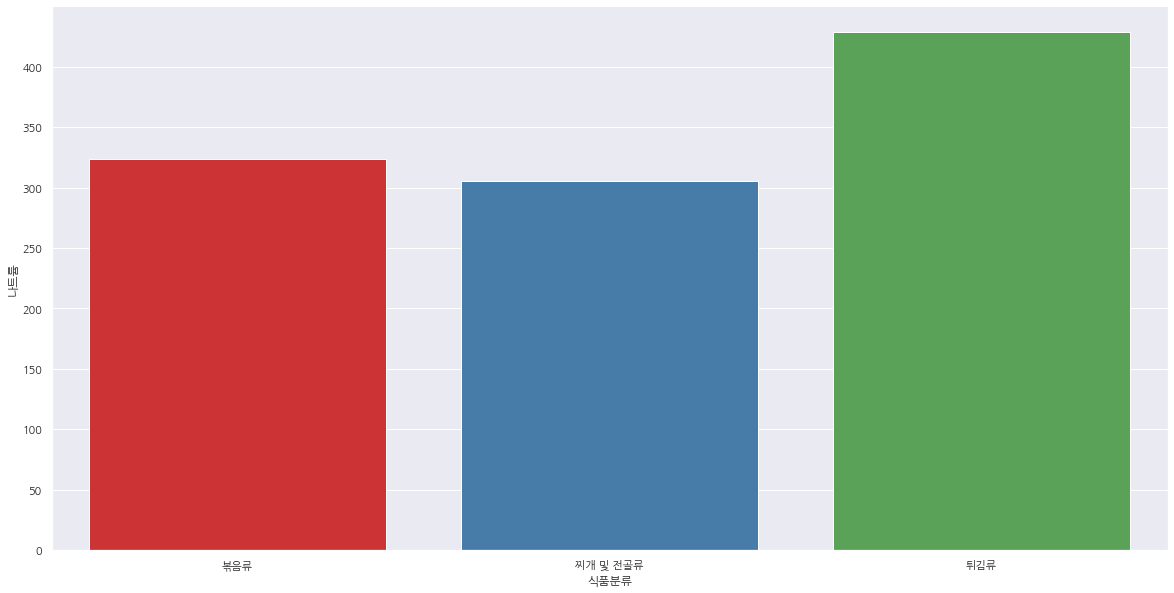

In [84]:
# 100G당 나트륨 함량
fig, ax = plt.subplots(figsize = (20,10))
sns.set(font ='NanumGothicOTF',
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.barplot(x='식품대분류',y='나트륨', data=df_na, palette='Set1')
ax.set(xlabel='식품분류',ylabel='나트륨')